<a href="https://colab.research.google.com/github/dong-gi-jang/binfo/blob/main/Week1_Fig4D%26S6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.tmux.conf
./root/.bashrc.biolab
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.profile
./root/.vimrc
--2022-05-13 04:27:10--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  72.16M   258MB/s    in 0.3s    

2022-05-13 04:27:11 (258 MB/s) - ‘miniconda3.sh’ save

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## Google Drive에 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. 1G씩 끊어지지만 자동으로 이어받아집니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  drive/MyDrive/binfo1-datapack1/RPF-siLuc.bam
dc24f69e8f571f

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

--2022-04-29 05:08:48--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28359457 (27M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz’

/content/drive/MyDr 100%[===================>]  27.04M   955KB/s    in 35s     

2022-04-29 05:09:24 (803 KB/s) - ‘/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz’ saved [28359457/28359457]



다루기 쉽도록 Annotation 압축을 풉니다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

In [ ]:
!ls -al drive/MyDrive/binfo*

drive/MyDrive/binfo:
total 0

drive/MyDrive/binfo1-datapack1:
total 7136706
-rw------- 1 root root 1370036258 May  6  2021 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6  2021 CLIP-35L33G.bam.bai
-rw------- 1 root root  883334756 Mar  9  2021 gencode.gtf
-rw------- 1 root root 1003658801 May  6  2021 RNA-control.bam
-rw------- 1 root root    2276104 May  6  2021 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6  2021 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May  6  2021 RNA-siLin28a.bam.bai
-rw------- 1 root root  981684502 May  6  2021 RNA-siLuc.bam
-rw------- 1 root root    2606104 May  6  2021 RNA-siLuc.bam.bai
-rw------- 1 root root  737352902 May  6  2021 RPF-siLin28a.bam
-rw------- 1 root root    2482768 May  6  2021 RPF-siLin28a.bam.bai
-rw------- 1 root root 1055123479 May  6  2021 RPF-siLuc.bam
-rw------- 1 root root    2605912 May  6  2021 RPF-siLuc.bam.bai


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y subread

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [ ]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

## 결과를 pandas로 읽어와 봅니다.

In [ ]:
import pandas as pd
import numpy as np

%cd /content/drive/MyDrive/binfo1-datapack1/

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

/content/drive/MyDrive/binfo1-datapack1


In [ ]:
# 각 컬럼의 sum (total assigned read count)으로 normalize해도 되는가.
# bam파일 자체에서의 align reads 수로 noramlize 해야 하나.
cnts['clip_enrichment'] = np.log2(   (cnts['CLIP-35L33G.bam']/cnts['CLIP-35L33G.bam'].sum() ) / (cnts['RNA-control.bam']/cnts['RNA-control.bam'].sum() ) )
cnts['rden_change'] = np.log2( (   (cnts['RPF-siLin28a.bam']/cnts['RPF-siLin28a.bam'].sum()) / (cnts['RNA-siLin28a.bam']/cnts['RNA-siLin28a.bam'].sum() ) / ( (cnts['RPF-siLuc.bam']/cnts['RPF-siLin28a.bam'].sum() )/ (cnts['RNA-siLuc.bam']/cnts['RNA-siLuc.bam'].sum()))))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# log2 미리 처리하면서 CLIP enrichemnt, density change 열 추가.

cnts['clip_enrichment'] = np.log2(cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam'])
cnts['rden_change'] = np.log2((cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,2.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [ ]:
# Geneid(index) 마다 있는 점 뒤쪽 제거

import copy

cnts_rmdot = copy.deepcopy(cnts)
cnts_rmdot.index = cnts_rmdot.index.map(lambda p : p.split('.')[0])
cnts_rmdot.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,0.60993,NaN
ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [ ]:
# cutoff 정해 low abundant 제거하기
# <80 raw reads in siLuc ?
rna_cutoff = 30
ribo_cutoff = 80

ribobool = cnts_rmdot['RPF-siLuc.bam'] > ribo_cutoff
rnabool = cnts_rmdot['RNA-siLuc.bam'] > rna_cutoff
lin28abool = cnts_rmdot['RNA-siLin28a.bam'] > rna_cutoff
clipbool = cnts_rmdot['RNA-control.bam'] > rna_cutoff
cnts_cutoff = cnts_rmdot[ribobool & rnabool & lin28abool & clipbool]

# 아니면 cnts_cutoff = cnts_rmdot[ribobool & rnabool] 까지만
cnts_cutoff.head()
cnts_cutoff.shape

(7960, 13)

In [ ]:
corrtable = cnts_cutoff[['clip_enrichment','rden_change']].corr(method='pearson')
corr = round(corrtable.iloc[0,1],4)
print(corrtable)
print(corr)

                 clip_enrichment  rden_change
clip_enrichment         1.000000     0.479784
rden_change             0.479784     1.000000
0.4798


이제 한 번 대충 그림을 그려 봅니다.

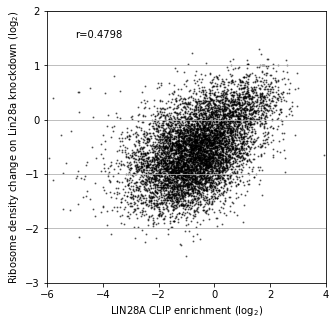

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5,5))
plt.xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
plt.ylabel(r'Ribosome density change on Lin28a knockdown ($\log_2$)')
plt.xlim(-6,4)
plt.ylim(-3,2)
plt.grid(True, axis='y')
plt.text(-5, 1.5,f'r={corr}')
ax.scatter(cnts_cutoff['clip_enrichment'],cnts_cutoff['rden_change'], c= 'black', alpha=0.5, s=1)

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [ ]:
# geneid를 index로 만들기
mouselocal2 = mouselocal.set_index('gene_id')
mouselocal2.head()

,Gene names,type
gene_id,,
ENSMUSG00000000001,Gnai3,cytoplasm
ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
ENSMUSG00000000049,Apoh B2gp1,cytoplasm
ENSMUSG00000000058,Cav2,cytoplasm
ENSMUSG00000000085,Scmh1,nucleus


In [ ]:
# merge(left join).
mouselocal3 = pd.merge(cnts_cutoff,mouselocal2,left_index=True,right_index=True,how='left')
print(mouselocal3.shape)
mouselocal3.head(5)

(7981, 15)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Gene names,type
ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,1981,717,1491,1817,341,652,0.076114,-0.309975,Gnai3,cytoplasm
ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,509,503,1031,955,222,394,-1.372963,-0.598261,Cdc45 Cdc45l Cdc45l2,nucleus
ENSMUSG00000000056,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr1...,121128079;121129245;121133327;121135364;121135...,121128177;121129343;121133470;121135552;121135...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,4806,237,197,457,383,133,179,-1.123379,-0.343536,NaN,NaN
ENSMUSG00000000078,chr13;chr13;chr13;chr13;chr13;chr13;chr13;chr1...,5911481;5911540;5913557;5914677;5914767;591476...,5911841;5911841;5913624;5915343;5915343;591534...,+;+;+;+;+;+;+;+;+;+;+,4391,600,173,462,435,128,149,0.404120,0.033801,NaN,NaN
ENSMUSG00000000085,chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;c...,120262478;120262504;120262563;120262578;120262...,120262653;120262653;120262653;120262653;120262...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7731,102,97,196,120,39,86,-1.317558,-1.508835,Scmh1,nucleus


In [ ]:
# inner join 일단은 이거 써보자
mouselocal4 = pd.merge(cnts_cutoff,mouselocal2,left_index=True,right_index=True,how='inner')
print(mouselocal4.shape)
mouselocal4.head()

(4504, 15)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Gene names,type
ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,1981,717,1491,1817,341,652,0.076114,-0.309975,Gnai3,cytoplasm
ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,509,503,1031,955,222,394,-1.372963,-0.598261,Cdc45 Cdc45l Cdc45l2,nucleus
ENSMUSG00000000085,chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;c...,120262478;120262504;120262563;120262578;120262...,120262653;120262653;120262653;120262653;120262...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7731,102,97,196,120,39,86,-1.317558,-1.508835,Scmh1,nucleus
ENSMUSG00000000120,chr11;chr11;chr11;chr11;chr11;chr11,95459644;95462646;95465017;95468800;95471779;9...,95461921;95462806;95465269;95469159;95471920;9...,-;-;-;-;-;-,3446,449,174,1259,425,1989,1085,-0.022442,-0.352549,Ngfr Tnfrsf16,integral membrane
ENSMUSG00000000127,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,64170057;64171010;64185061;64203013;64203013;6...,64170219;64171050;64185137;64203278;64203278;6...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,4680,427,157,493,494,109,231,0.053401,-0.740795,Fer Fert2,nucleus


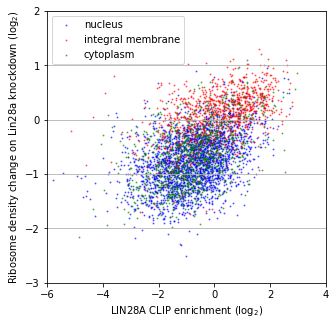

In [ ]:
# subcellular localization visualize (for inner joined df)
# 점 랜덤하게 취해 개수 줄일수도 ? 
fig, ax = plt.subplots(1, 1, figsize=(5,5))

plt.xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
plt.ylabel(r'Ribosome density change on Lin28a knockdown ($\log_2$)')
plt.xlim(-6,4)
plt.ylim(-3,2)
plt.grid(True, axis='y')
localname = ['nucleus','integral membrane','cytoplasm']
colorlist = ['blue','red','green']
for i, j in zip(localname, colorlist):
  ax.scatter(mouselocal4[mouselocal4['type']==i]['clip_enrichment'],mouselocal4[mouselocal4['type']==i]['rden_change'], alpha=0.5, s=1, label=i,color=j)
plt.legend(loc='upper left')